In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
import random
import numpy as np
import math
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
Iris = sns.load_dataset("iris")

In [19]:
class KNN:
  def __init__(self, features , targets ,queryData, K = 1 ,typeOfDistance = 0  ):
    self.K = K
    self.features = features
    self.targets = targets
    self.typeOfDistance = typeOfDistance
    self.queryData = queryData
    

  def predictClassOfQueryData(self):
    KNN = np.ones((3,self.K)) * math.inf
    for i in range(self.features.shape[0]):
      self.updateKNN(KNN , self.features[i] ,i)
    return {'distances':KNN[0] ,'indexInDataset':KNN[1],'classes':KNN[2], 'popular class':self.findClass(KNN[2])}


  def findClass(self,classOfNN):
    counts = np.bincount(classOfNN.astype(int))
    return np.argmax(counts)


  def updateKNN(self , KNN , row , indexOfRow):
    indexOfMaxDistance = np.argmax(KNN[0])
    distance = self.computeDistance(row)
    if distance < KNN[0,indexOfMaxDistance] :
      KNN.T[indexOfMaxDistance] = distance , indexOfRow , self.targets[indexOfRow]

  def computeDistance(self , row):
    if (self.typeOfDistance == 0 ):
      return distance.euclidean(row,self.queryData)
    if (self.typeOfDistance == 1):
      return distance.cdist([row],[self.queryData], metric='cityblock')[0,0]
    if (self.typeOfDistance == 2):
      return distance.cosine(row,self.queryData )


def leave_one_out_cross_validation_for_KNN( features , targets , K , distanceType):
  y_pred=[]
  for i in range(features.shape[0]):
    model = KNN(features[np.arange(len(features))!=i],targets[np.arange(len(targets))!=i],features[i] ,K , distanceType )
    a = model.predictClassOfQueryData()
    y_pred.append(a['popular class'])
  return y_pred

    




In [20]:
iris = datasets.load_iris()
features = iris.data  
target = iris.target
dataset = np.hstack(( features,target.reshape(-1,1)))
dataset.shape
#---------------shuffle---------------------
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.shape




(150, 5)

In [21]:
y_pred = leave_one_out_cross_validation_for_KNN(dataset[:,0:4], dataset[:,4],K=20,distanceType=1 )

In [22]:
from sklearn.metrics import confusion_matrix
y_true = dataset[:,4].T
cm = confusion_matrix(y_true, y_pred)


0.9733333333333334 % 





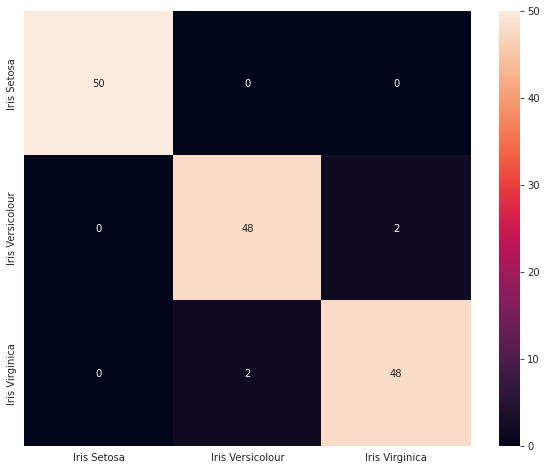

In [23]:
df_cm = pd.DataFrame(cm,['Iris Setosa','Iris Versicolour','Iris Virginica'],['Iris Setosa','Iris Versicolour','Iris Virginica'])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

true = np.diag(cm)

accuracy = np.sum(true)/np.sum(cm)

print(str(accuracy)+' % \n\n\n')

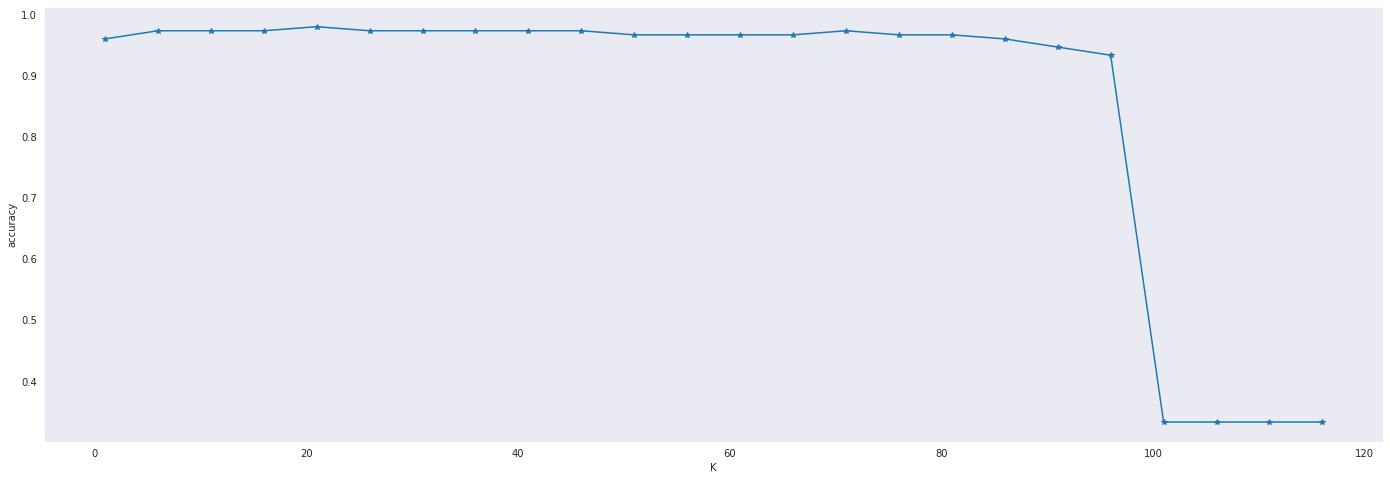

In [16]:
accs = []
for i in range(1,120,5):
  y_pred = leave_one_out_cross_validation_for_KNN(dataset[:,0:4], dataset[:,4],K=i,distanceType=2 )
  y_true = dataset[:,4].T
  cm = confusion_matrix(y_true, y_pred)
  true = np.diag(cm)
  accuracy = np.sum(true)/np.sum(cm)
  accs.append(accuracy)
sns.set_style("darkgrid")
plt.figure(figsize = (24,8))
plt.plot(range(1,120,5), accs , marker = '*')
plt.xlabel("K")
plt.ylabel("accuracy")
plt.grid()
plt.show()
